1. 📥 Load and Inspect the Data
2. 🧹 Clean and Prepare Data
3. 📊 Basic Trends (Global Cases & Deaths)
4. 🌍 Country-wise Comparisons
5. 📈 Moving Averages & Trends Over Time
6. 🔍 Highlight Key Insights (Peaks, Waves)


In [1]:
# 1. Load and Inspect the Data

import pandas as pd

# Load the dataset (after downloading from Kaggle)
df = pd.read_csv('owid-covid-data.csv')

# Show basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.head()


Shape: (194031, 67)

Columns:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_v

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194031 entries, 0 to 194030
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    194031 non-null  object 
 1   continent                                   182762 non-null  object 
 2   location                                    194031 non-null  object 
 3   date                                        194031 non-null  object 
 4   total_cases                                 186353 non-null  float64
 5   new_cases                                   186133 non-null  float64
 6   new_cases_smoothed                          184959 non-null  float64
 7   total_deaths                                167820 non-null  float64
 8   new_deaths                                  167801 non-null  float64
 9   new_deaths_smoothed                         166638 non-null  float64
 

In [3]:
df.isnull().sum()

iso_code                                        0
continent                                   11269
location                                        0
date                                            0
total_cases                                  7678
                                            ...  
human_development_index                     38331
excess_mortality_cumulative_absolute       187425
excess_mortality_cumulative                187425
excess_mortality                           187425
excess_mortality_cumulative_per_million    187425
Length: 67, dtype: int64

In [5]:
# 2. Clean and Prepare Data

# Keep relevant columns
columns_to_keep = [
    'iso_code', 'continent', 'location', 'date',
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'population'
]
df = df[columns_to_keep]
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,39835428.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,39835428.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,39835428.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,39835428.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,39835428.0


In [13]:
print(df.isnull().sum())
df.shape

iso_code            0
continent           0
location            0
date                0
total_cases      7671
new_cases        7898
total_deaths    25998
new_deaths      26217
population        317
dtype: int64


(182762, 9)

In [14]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop aggregate rows (like "World", "Asia", etc.)
df = df[df['continent'].notna()]

In [15]:
# Fill missing new cases/deaths with 0
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)

# Sort data for forward filling
df.sort_values(by=['location', 'date'], inplace=True)

# Forward fill total cases/deaths for each country
df[['total_cases', 'total_deaths']] = df.groupby('location')[['total_cases', 'total_deaths']].ffill()

# Drop rows with missing population
df = df[df['population'].notna()]

# Final check
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
iso_code            0
continent           0
location            0
date                0
total_cases      7354
new_cases           0
total_deaths    25681
new_deaths          0
population          0
dtype: int64


In [17]:
df = df[df['total_cases'].notna()]
df = df[df['total_deaths'].notna()]
print(df.isnull().sum())

iso_code        0
continent       0
location        0
date            0
total_cases     0
new_cases       0
total_deaths    0
new_deaths      0
population      0
dtype: int64


In [18]:
df.shape

(162717, 9)

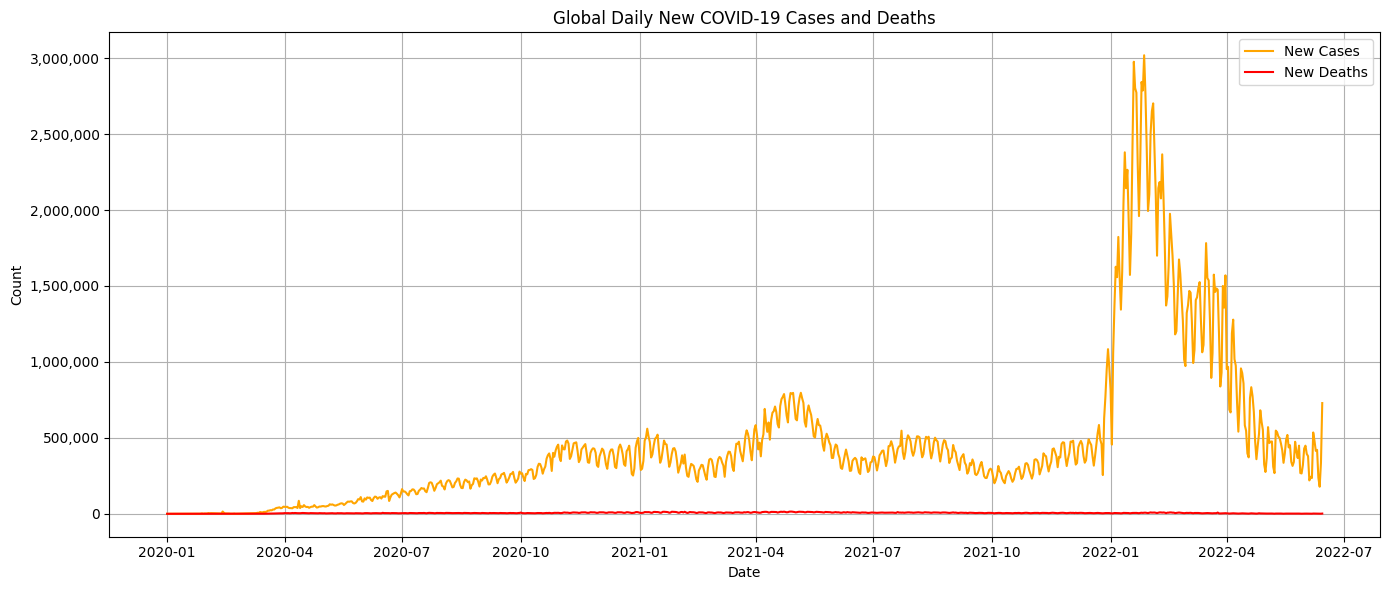

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Aggregate global daily new cases and deaths
global_daily = df.groupby('date')[['new_cases', 'new_deaths']].sum()

plt.figure(figsize=(14,6))
plt.plot(global_daily.index, global_daily['new_cases'], label='New Cases', color='orange')
plt.plot(global_daily.index, global_daily['new_deaths'], label='New Deaths', color='red')
plt.title('Global Daily New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.gca().get_yaxis().set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [28]:
print(global_daily.index.name) 

date


In [30]:
# Latest date with complete data
latest_date = df['date'].max()

# Total cases by location on the latest date
top5_countries = (
    df[df['date'] == latest_date]
    .groupby('location')['total_cases']
    .sum()
    .nlargest(5)
    .index
)

top5_countries


Index(['Antigua and Barbuda', 'Thailand', 'Aruba', 'Mongolia', 'Palestine'], dtype='object', name='location')

Filter Data for Those Countries

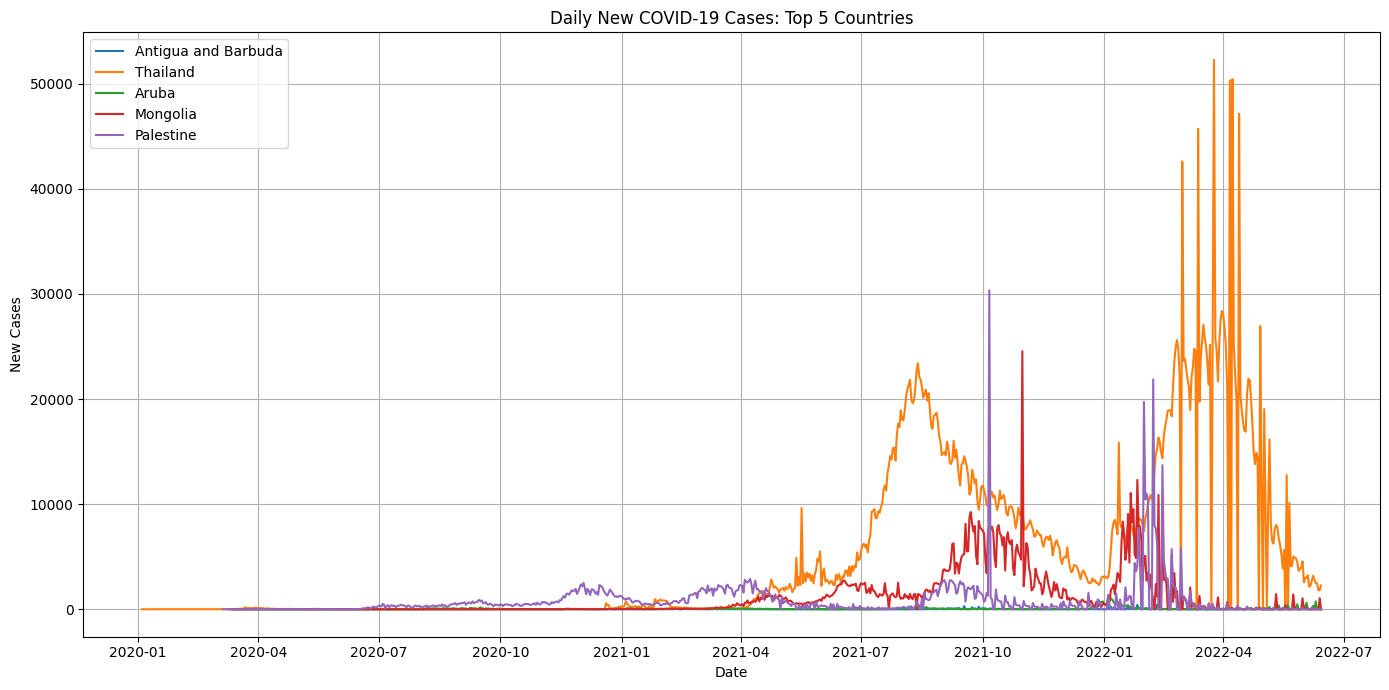

In [31]:
top5_df = df[df['location'].isin(top5_countries)]
plt.figure(figsize=(14, 7))

for country in top5_countries:
    country_data = top5_df[top5_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases: Top 5 Countries')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



1. Bar Chart: Total Cases vs Total Deaths for Top 5 Countries

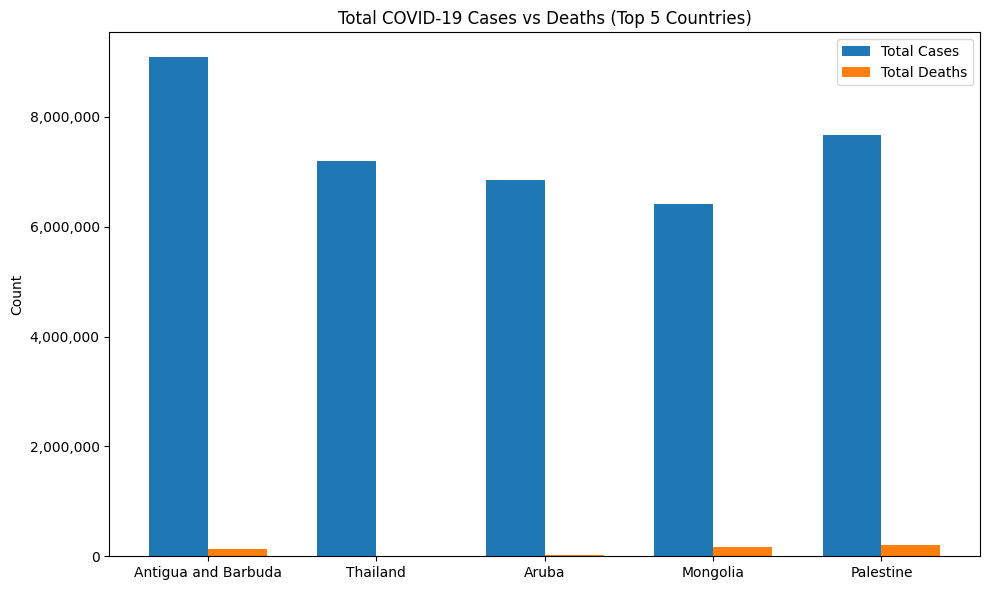

In [33]:
import numpy as np

# Filter latest data again
latest_data = df[df['date'] == df['date'].max()]
top5_data = latest_data[latest_data['location'].isin(top5_countries)]

# Prepare values
cases = top5_data.set_index('location')['total_cases']
deaths = top5_data.set_index('location')['total_deaths']

# Bar plot
x = np.arange(len(top5_countries))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, cases, width, label='Total Cases')
plt.bar(x + width/2, deaths, width, label='Total Deaths')

plt.xticks(x, top5_countries)
plt.title('Total COVID-19 Cases vs Deaths (Top 5 Countries)')
plt.gca().get_yaxis().set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


2. Adjusted Metric: Cases per Million Population

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13876\1881850963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_data['cases_per_million'] = top5_data['total_cases'] / top5_data['population'] * 1_000_000


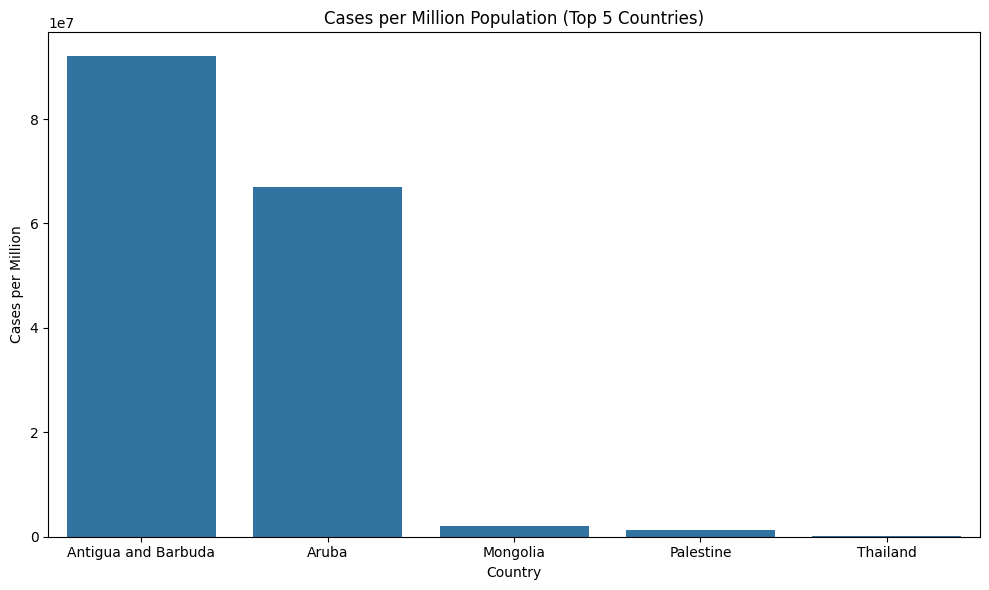

In [38]:
import seaborn as sns
top5_data['cases_per_million'] = top5_data['total_cases'] / top5_data['population'] * 1_000_000

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='cases_per_million', data=top5_data)
plt.title('Cases per Million Population (Top 5 Countries)')
plt.ylabel('Cases per Million')
plt.xlabel('Country')
plt.tight_layout()
plt.show()
